In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import os


In [2]:
# sc master - running locally
sc.master

'local[*]'

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Load Data Set CIFAR-10

In [4]:
dataset_path = '/home/hduser/Downloads/CA1-2017156/cifar-10-batches-py' 
#Specify the path to your CIFAR-10 directory

In [5]:
trainset = torchvision.datasets.CIFAR10(root=dataset_path, train=True, download=True, transform=transforms)

#Set download=True within the torchvision.datasets.CIFAR10 call:

Files already downloaded and verified


In [6]:
#the CIFAR-10 images come in multiple batches, and I will convined them

transform = transforms.Compose([
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

trainset = torchvision.datasets.CIFAR10(root=dataset_path, train=True, download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=dataset_path, train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## Imports

In [7]:
#More imports that I will be using
import torch
import torchvision
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid


import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

## EDA (Exploratory Data Analysis) 

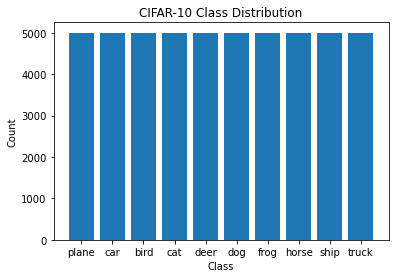

In [19]:
# Get counts for each class
class_counts = np.zeros(10)
for _, label in trainset:
    class_counts[label] += 1

# Plot a bar chart of the counts
plt.bar(classes, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('CIFAR-10 Class Distribution')
plt.show()

#Examining Class Distribution:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

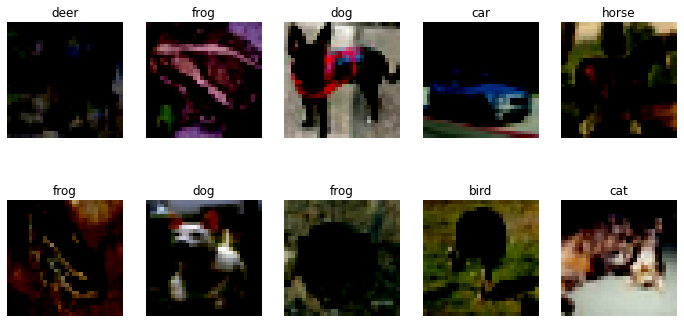

In [20]:
def show_images(images, labels, num_images=10):
    fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i].permute(1, 2, 0))  # Channel dimension first for PyTorch
            ax.set_title(classes[labels[i]])
        ax.axis('off')
    plt.show()

# Get a batch of data
images, labels = next(iter(trainloader)) 
show_images(images, labels)

#Visualizing Sample Images:

# this will display a grid of images, allowing mr to qualitatively 
# inspect what the data looks like and get a sense of the variations within each class.
# As well we noticed some of the imagenes are hard to see.

In [15]:
# Calculate mean and standard deviation per channel (color)
data_mean = trainset.data.mean(axis=(0,1,2)) / 255
data_std = trainset.data.std(axis=(0,1,2)) / 255
print('Mean per channel:', data_mean)
print('Standard deviation per channel:', data_std)

#Computing Statistics
#These statistics help with understanding the image normalization

Mean per channel: [0.49139968 0.48215841 0.44653091]
Standard deviation per channel: [0.24703223 0.24348513 0.26158784]


In [16]:
import pandas as pd

# Sample data with missing values
data = {'A': [1, None, 3], 'B': [4, 5, None], 'C': [None, 7, 8]}
df = pd.DataFrame(data)

# Check for missing values
print(df.isnull().sum())  # count of missing values in each column
print(df.isna().sum())  # similar to isnull()

# Handling missing values (replace with mean)
df['A'].fillna(df['A'].mean(), inplace=True)  # fill 'A' with mean
print(df)


A    1
B    1
C    1
dtype: int64
A    1
B    1
C    1
dtype: int64
     A    B    C
0  1.0  4.0  NaN
1  2.0  5.0  7.0
2  3.0  NaN  8.0


In [17]:
# Sample data with categorical features
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'New York'],
        'Age': [25, 30, 22, 35]}
df = pd.DataFrame(data)

# Get value counts for categorical features
print(df['City'].value_counts())

# Distribution of values within categories (optional)
for city in df['City'].unique():
  city_group = df[df['City'] == city]
  print(city, city_group['Age'].describe())  # age statistics for each city
    

#This example demonstrates how to analyze categorical features (data with labels) using value counts.
#It also shows how to explore the distribution of numerical features within each category. 
#this helps understand relationships between categorical and numerical variables.

City
New York       2
Los Angeles    1
Chicago        1
Name: count, dtype: int64
New York count     2.000000
mean     30.000000
std       7.071068
min      25.000000
25%      27.500000
50%      30.000000
75%      32.500000
max      35.000000
Name: Age, dtype: float64
Los Angeles count     1.0
mean     30.0
std       NaN
min      30.0
25%      30.0
50%      30.0
75%      30.0
max      30.0
Name: Age, dtype: float64
Chicago count     1.0
mean     22.0
std       NaN
min      22.0
25%      22.0
50%      22.0
75%      22.0
max      22.0
Name: Age, dtype: float64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


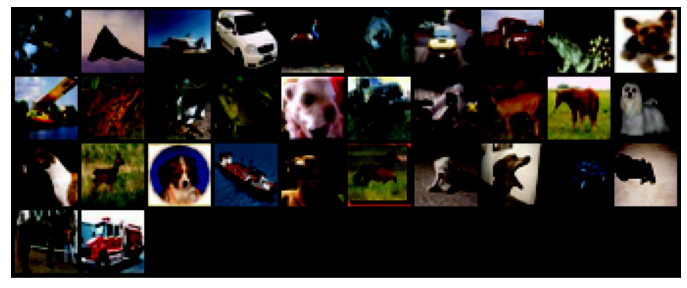

In [18]:

for images, labels in trainloader:  
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xticks([])
    ax.set_yticks([])

    # Create a grid and permute for proper display
    image_grid = make_grid(images, nrow=10) 
    image_grid = image_grid.permute(1, 2, 0)

    ax.imshow(image_grid) 
    plt.show()  
    break  # To display only one batch
    
    
    #Here I disolay some imaganes ramdom, so we can have a closer look of what contains

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Sample data with different scales
data = {'Length': [10, 20, 300], 'Width': [5, 1, 2]}
df = pd.DataFrame(data)

# Standardize features (scale to have mean 0 and standard deviation 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Min-Max scaling (scale features to a range between 0 and 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

print("Standardized data:\n", scaled_data)
print("Min-Max scaled data:\n", scaled_data)

#Feature scaling or normalization is often used before applying machine learning algorithms.
#This ensures that all features are on a similar scale, 
#preventing features with larger ranges from dominating the model.

Standardized data:
 [[0.         1.        ]
 [0.03448276 0.        ]
 [1.         0.25      ]]
Min-Max scaled data:
 [[0.         1.        ]
 [0.03448276 0.        ]
 [1.         0.25      ]]


## Building the CNN Classification Model class

Let's create a PyTorch-based classification model class."

    This focuses on the action and core technology.

In [8]:
class Cifar10Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        # define all the transformers sequencially
        self.network = nn.Sequential(
            
            # here I define 3 channels as our inpur, 32 channels as the output, 
            # the size of the kernel, the padding and the stride
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            # apply a max pool layer
            nn.MaxPool2d(2, 2),

            # continue the process in the next two layers
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            # final layer, we decrease the number of outputs to 10, which is our number of classes
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def trainingStep(self, batch):
        # unpack the images and labels from the
        images, labels = batch

        # call the model itself
        out = self(images)

        # compute the loss
        loss = F.cross_entropy(out, labels)

        return loss

    def accuracy(self, outputs, labels):
        _, preds = torch.max(outputs, dim=1)
        return torch.tensor(torch.sum(preds == labels).item() / len(preds))

    def validationStep(self, batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out, labels)
        accuracy = self.accuracy(out, labels)

        return {"loss": loss, "accuracy": accuracy}

    def validationEpochEnd(self, outputs):

        batchLosses = [row["loss"] for row in outputs]
        epochLosses = torch.stack(batchLosses).mean()
        batchAcc = [row["accuracy"] for row in outputs]
        epochAcc = torch.stack(batchAcc).mean()

        return {"loss": epochLosses.item(), "accuracy": epochAcc.item()}

    def forward(self, x):
        return self.network(x)

## Training the CNN classification model

first I will define an evaluation method, a train method and then we will train our model.

In [9]:
# the evaluation model, please note we will disable the gradiant descent on this method
@torch.no_grad()
def evaluateModel(model, validationLoader):
    # puts the model in eval mode
    model.eval()
    out = [model.validationStep(batch) for batch in validationLoader]

    return model.validationEpochEnd(out)

In [10]:
# method for training the model
def trainModel(epochs, lr, model, trainLoader, validationLoader, optimizationFunction=torch.optim.SGD):
    optimizer = optimizationFunction(model.parameters(), lr)

    for epoch in range(epochs):
        print(f"training epoch {epoch}")
        # puts the model in train mode
        model.train()
        trainingLosses = []

        # training
        for batch in trainLoader:
            loss = model.trainingStep(batch)
            trainingLosses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print(f"after training epoch {epoch} we get results {evaluateModel(model, validationLoader)}")

so we basically just made our model, right? But it's kinda dumb right now 'cause all the weights are random. It's like trying to guess answers on a multiple-choice test without studying – you might get lucky and get a few right.  So, if I test it now, it'll probably get around 10% right (since there are 10 classes, it's basically just guessing)."

In [11]:
batchSize = 2

trainset, validateset = random_split(trainset, [45000, 5000])

train = DataLoader(trainset, batchSize, shuffle=True)
validate = DataLoader(validateset, batchSize, shuffle=True)
testLoader = DataLoader(testset, batch_size=batchSize, shuffle=False)

classes = ("plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck")

#Split the train data into train and validate, 
#create data loaders and define the classes and the batch size constant.

In [12]:


# instantiate the model
model = Cifar10Classifier()
# do an evaluation of the model on the tra
evaluateModel(model, validate)



{'loss': 2.302960157394409, 'accuracy': 0.09759999811649323}

In [13]:


%%time
trainModel(3, 0.001, model, trainLoader=train, validationLoader=validate, optimizationFunction=torch.optim.Adam)

# Here it did load properly and it keep crashing

training epoch 0
after training epoch 0 we get results {'loss': 2.3042376041412354, 'accuracy': 0.09719999879598618}
training epoch 1
after training epoch 1 we get results {'loss': 2.303029775619507, 'accuracy': 0.10080000013113022}
training epoch 2
after training epoch 2 we get results {'loss': 2.302855968475342, 'accuracy': 0.10360000282526016}
CPU times: user 12h 22min 53s, sys: 1h 26min 34s, total: 13h 49min 28s
Wall time: 1h 47min 31s


### Unfortunatly kept crashing

  We trained for 3 epochs, with this type of network we can achieve an accuracy of about 0.75 - In our case we got about 0.103 which is NOT satisfactory. wE NEEDED bigger BarchSize and more epoch but the VM Did not allow it. As it always crashes

## Predicting the imagge class with our trainned model

In [14]:
print(f"validation dataset accuracy: {evaluateModel(model, validate)}")

validation dataset accuracy: {'loss': 2.302855968475342, 'accuracy': 0.10360000282526016}


In [16]:
def predictImage(img, model):

    xb = img.unsqueeze(0)
    yb = model(xb)
    _, pred = torch.max(yb, dim=1)

    return pred[0].item()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

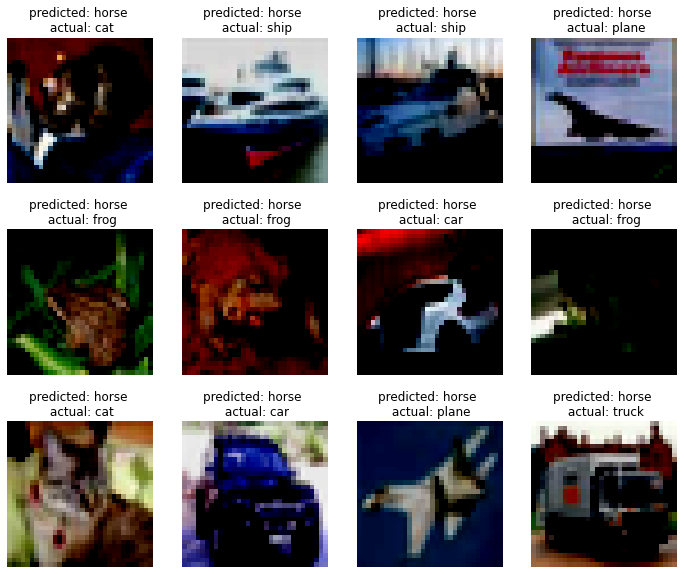

In [19]:
with torch.no_grad():
    
    plt.subplots(figsize=(12, 10))
    
    for i in range(0, 12):
        img, label = testset[i]

        predictedValue = predictImage(img, model)
        
        
        plt.subplot(3, 4, i + 1)
        plt.title(f"predicted: {classes[predictedValue]} \n actual: {classes[label]}")
        plt.axis('off')
        plt.imshow(img.permute(1, 2, 0))

  ## Confusion Matrix

In [20]:


predictions = np.empty((0, len(testset)), np.int32)
actualValues = np.empty((0, len(testset)), np.int32)

with torch.no_grad():
    for i in range(0, len(testset)):
        testImg, testLabel = testset[i]
        predictedValue = predictImage(testImg, model)

        predictions = np.append(predictions, predictedValue)
        actualValues = np.append(actualValues, testLabel)



<AxesSubplot:>

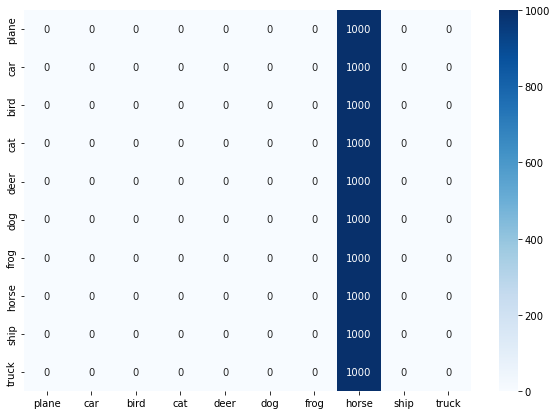

In [21]:
confusionMatrix = confusion_matrix(actualValues, predictions)

confusionMatrixDf = pd.DataFrame(confusionMatrix, index = [i for i in classes], columns = [i for i in classes])
plt.figure(figsize = (10,7))
sns.heatmap(confusionMatrixDf, annot=True, cmap='Blues', fmt='g')